**Laboratory work 1 - Relationship between solar radio flux F10.7 and sunspot number**

**Nikolay Zherdev, Carolina Latserus, Dmitry Baluev**

**Skoltech, 03.10.2018**

The goal of this laboratory work is to understand the relationship between main indicators of solar activity, sunspot number and the solar radio flux at 10.7 cm (2800 MHz) by applying multi-dimensional linear regression technique.

** 3) Make scater plot between monthly mean sunspot number and solar radio flux F10.7cm. Every plot should contain: title, title of x axis, title of y axis, legend of lines on plot. Make a conclusion if relationship between solar activity indicators is observed. **

In [15]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib.pyplot import figure

years = [] # year
months = [] # month
radio_flux = [] # monthly solar radio flux at 10.7 cm
sunspots = [] # monthly sunspot number

# better use pd.read_csv instead
with open("/Users/nickzherdev/Desktop/Experimental_Data_Processing/data_group2.txt", 'r') as f:
    content = f.readlines()
    n = len(content)
    for x in content:
        row = x.split()
        years.append(int(row[0]))
        months.append(int(row[1]))
        radio_flux.append(float(row[2]))
        sunspots.append(float(row[3]))

day = [1 for i in range(n)] # this is just to make function pd.to_datetime work properly 
                            # (it requirs day, month and year minimum)

# creating proper data type to work with pandas
pd_radio_flux = pd.Series(radio_flux)
pd_sunspots = pd.Series(sunspots)
pd_months = pd.Series(months)
pd_years = pd.Series(years)
pd_day = pd.Series(day)

# this is like a dict in python but for pandas
dataframe = pd.DataFrame({ # make pandas . timestamp
    'year': pd_years,
    'month': pd_months,
    'radio_flux': pd_radio_flux,
    'sunspots': pd_sunspots,
    'day': pd_day
})

# combining datetime to make smooth plot
date = pd.to_datetime(dataframe[['year', 'month', 'day']])

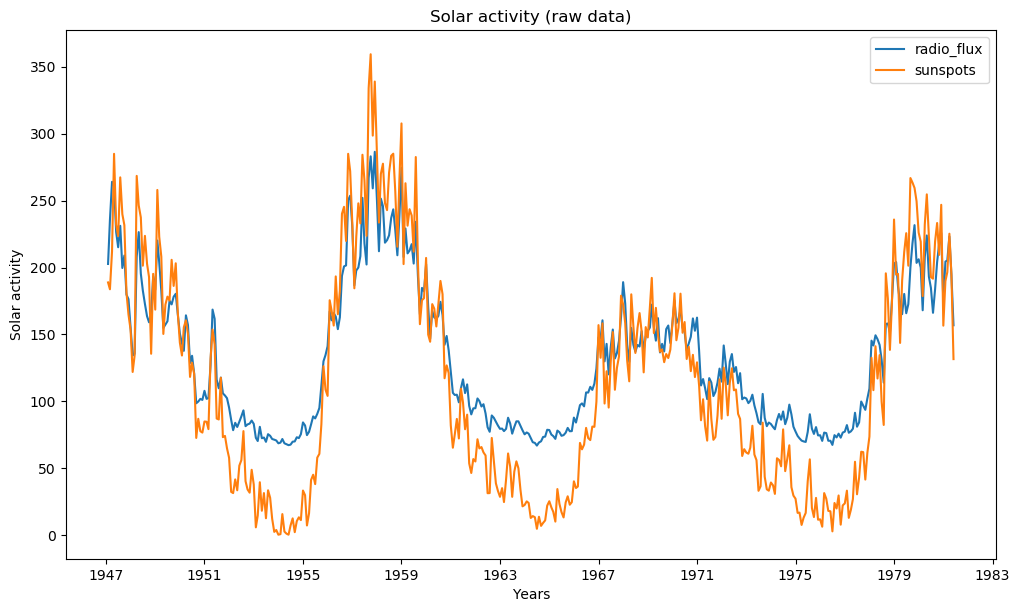

In [14]:
figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.plot(date, radio_flux, label= 'radio_flux')
plt.plot(date, sunspots, label= 'sunspots')
plt.xlabel('Years')
plt.ylabel('Solar activity')
plt.title('Solar activity (raw data)')
plt.legend()

There seems to be a positive correlation between monthly solar radio flux at 10.7 cm and monthly sunspot number.

** 4) Make smoothing of monthly mean data (sunspot number and solar radio flux F10.7) by 13-month running mean. Plot results. **

In [4]:
def running_mean(A):
    processed = []
    processed += A[:6] # add first 6 months, as they are already processed
    for i, value in enumerate(A[6:-6]):
        R = 1/24*A[i-6] + 1/12*(A[i-5] + A[i-4] + A[i-3] + A[i-2] + A[i-1] + A[i] + A[i+1] + A[i+2] + A[i+3] + A[i+4] + A[i+5]) + 1/24*A[i+6]
        processed.append(float("{:.1f}".format(R)))
    processed += A[-6:] # add last 6 months, as they are already processed
    return processed

running_mean_sunspots = np.array(running_mean(sunspots))
running_mean_flux = np.array(running_mean(radio_flux))

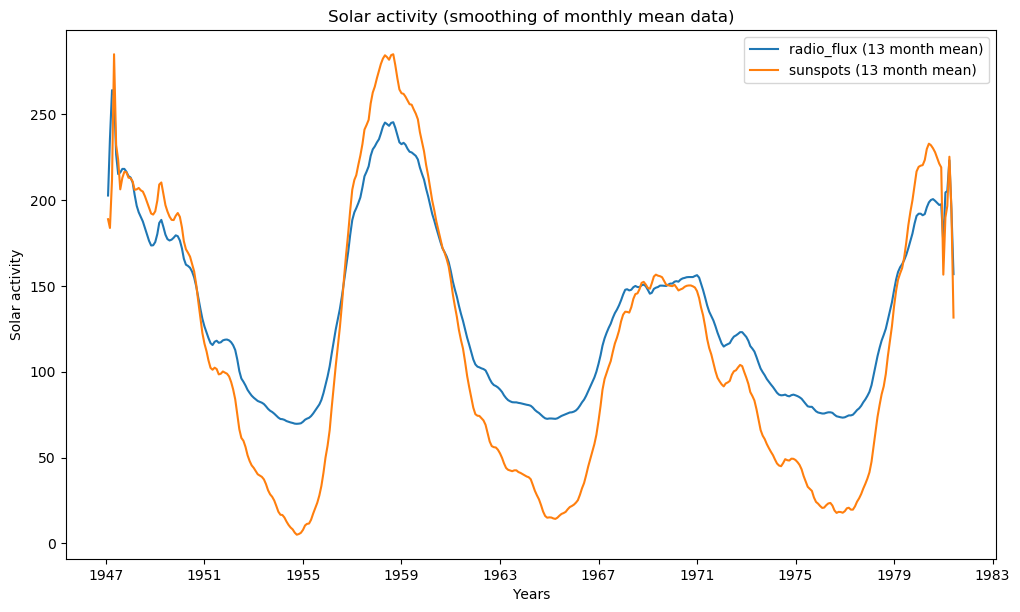

In [5]:
figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.plot(date, running_mean_flux, label= 'radio_flux (13 month mean)')
plt.plot(date, running_mean_sunspots, label= 'sunspots (13 month mean)')
plt.xlabel('Years')
plt.ylabel('Solar activity')
plt.title('Solar activity (smoothing of monthly mean data)')
plt.legend()

** 6) Determine vector of regressands (dependent variable), matrix of regressors vector (independent variables), and vector of coefficients. **

In [6]:
# now we need to make matrix R

sunspots_squared = []
sunspots_trippled = []

for i in running_mean_sunspots:
    sunspots_squared.append(float("{:.1f}".format(i**2))) 
    sunspots_trippled.append(float("{:.1f}".format(i**3)))

In [7]:
# Multi-dimensional linear regression
# 𝐹𝑖=𝛽0+𝛽1𝑅𝑖+𝛽2𝑅𝑖2+𝛽3𝑅𝑖3+𝜀𝑖

# + F - Vector of dependent variables - solar radio flux 
# + 𝑅 - Matrix of independent variables, sunspot number at different times.
# 𝛽 - vector of coefficients

ones = [1 for i in range(n)]
R = np.array(list(zip(ones, running_mean_sunspots, sunspots_squared, sunspots_trippled)))

** 7) Determine vector of coefficients by LSM.
The vector of coefficients is determined according to the given equation **

In [8]:
# 𝛽=(𝑅𝑇𝑅)−1𝑅𝑇𝐹
# calculate coefficients using closed-form solution

beta = inv(R.transpose().dot(R)).dot(R.transpose()).dot(running_mean_flux)

for i in beta:
    print(float("{:.3f}".format(i)))
print(beta)

65.533
0.429
0.001
-0.0
[ 6.55333191e+01  4.29436832e-01  1.48831514e-03 -2.71684827e-06]


** 8) Reconstruct solar radio flux at 10.7 cm on the basis of sunspot number using Equation (1) **

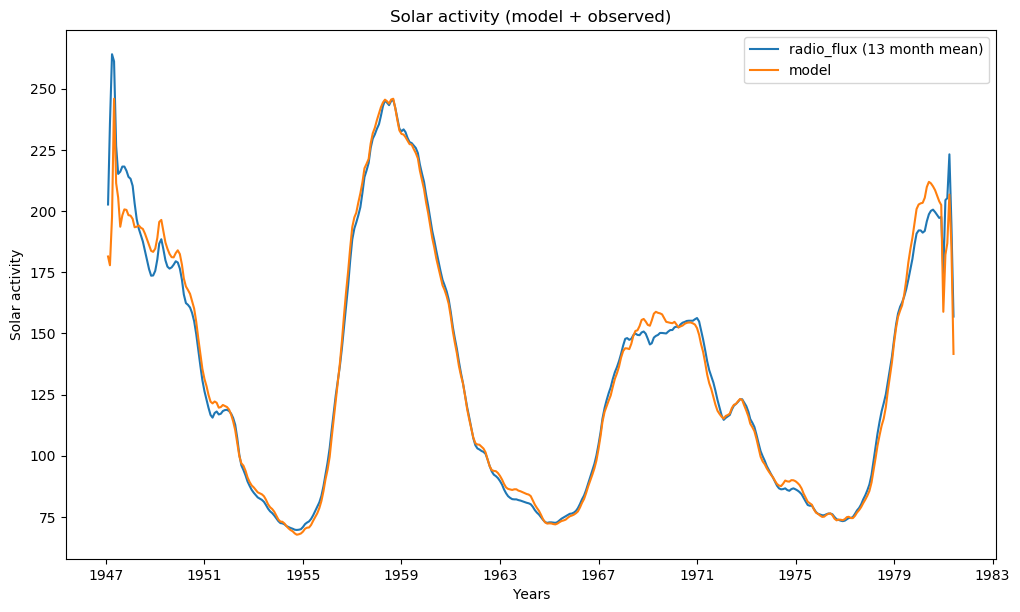

In [9]:
model_flux = np.array(R.dot(beta)) # Calculate regressand, Solar radio flux at 10.7 cm

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')
plt.plot(date, running_mean_flux, label= 'radio_flux (13 month mean)')
plt.plot(date, model_flux, label= 'model')
plt.xlabel('Years')
plt.ylabel('Solar activity')
plt.title('Solar activity (model + observed)')
plt.legend()

This plot demonstrates, that chosen linear regression models observed data well.

** 9) Determine the variance of estimation error of solar radio flux at 10.7 **

In [11]:
# so we have observed data running_mean_flux and model_flux
# now we need to calculate the variance of estimation error
N = running_mean_flux.shape[0]
error = model_flux - running_mean_flux
var = np.var(error, ddof = 1)
print("var", float("{:.2f}".format(var)))
#print("std", np.std(error, ddof=1))

var 45.15


** 10. Make conclusions to the laboratory work. **

In this laboratory work we applied multi-dimensional linear regression technique to understand the relationship between main indicators of solar activity: sunspot number and the solar radio flux at 10.7 cm (2800 MHz).
Last plot demonstrates, that calculated model describes relationship between sunspots and radio flux well.
Calculated varience of estimation error is 45.15